## Лабораторная работа 4. Правильный многоугольник Рело.Векторизация вычислений в `numpy`

##### Белоус Мария Руслановна 16.04.2025

## Задание 4.2. Построение правильного многоугольника Рело

Создайте матричное описание границы правильного многоугольника Рело для произвольных значений переменных n,center,r,  следуя аналогичным рассуждениям из Задания 4.1 (вычисление координат вершин, представление одной стороны, моделирование всей границы). Помните, что количество вершин многоугольника n должно быть нечетным.

Обратите внимание, что длина стороны l правильного многоугольника, на основании которого строится многоугольник Рело, является неизвестной величиной и должна быть выражена через количество вершин n и ширину r многоугольника Рело. Напишите подробно, как получена аналитическая зависимость l от n и r. Объяснения оформите в тексте документа с лабораторной работой.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Шаг 1: Определение переменных

In [2]:
n = 7  # кол-во вершин
center = np.array([0, 0])
r = 10.0
N = 100  # кол-во точек для одной стороны

### Шаг 2: Вычисление координат вершин правильного многоугольника

1. ##### Определение длины стороны:

Длина стороны l правильного многоугольника может быть выражена через радиус описанной окружности R:

$$ l = 2Rsin(\frac{\pi}{n}) $$ , где R -радиус описанной окружности :
$$ R = \frac {r}{2sin}(\frac{\pi}{n}) $$

2. ##### Вычисление координат вершин 

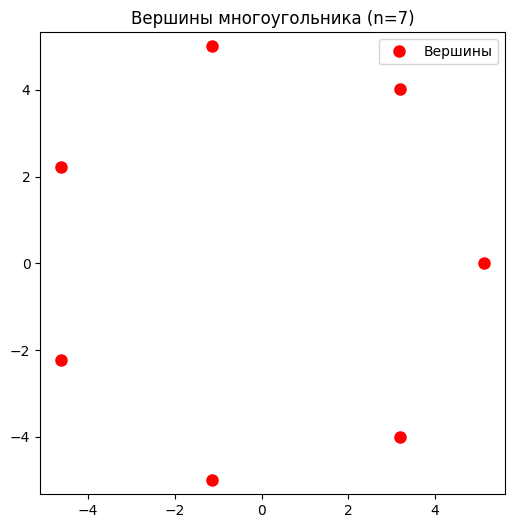

In [3]:
l = 2 * r * np.sin(np.pi / (2 * n))
R = l / (2 * np.sin(np.pi / n))

angles = np.arange(0, 2 * np.pi, 2 * np.pi / n)
vertices = center + R * np.column_stack((np.cos(angles), np.sin(angles)))

plt.figure(figsize=(6,6))
plt.plot(vertices[:, 0], vertices[:, 1], 'ro', markersize=8, label='Вершины')
plt.axis('equal')
plt.title("Вершины многоугольника (n=7)")
plt.legend()
plt.show()

## Шаг 3: Построение сторон многоугольника

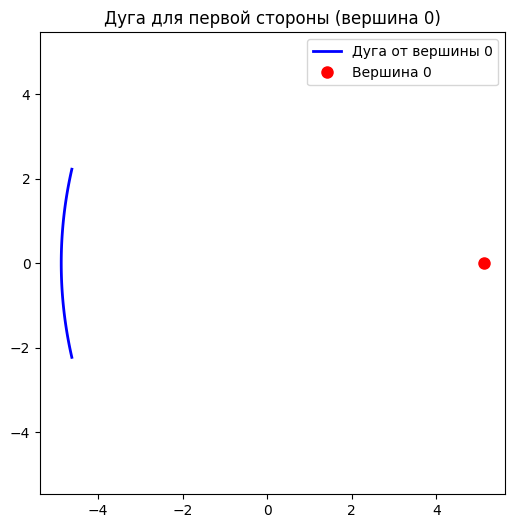

In [4]:
alpha = 2 * np.pi / n  
beta = alpha / 2        

arc_angles = np.linspace(-beta/2, beta/2, N)
side0 = vertices[0] + r * np.column_stack((
    np.cos(arc_angles + np.pi),
    np.sin(arc_angles + np.pi)
))

plt.figure(figsize=(6,6))
plt.plot(side0[:, 0], side0[:, 1], 'b-', lw=2, label='Дуга от вершины 0')
plt.plot(vertices[0, 0], vertices[0, 1], 'ro', markersize=8, label='Вершина 0')
plt.axis('equal')
plt.title("Дуга для первой стороны (вершина 0)")
plt.legend()
plt.show()

## Шаг 4: Построение графика многоугольника

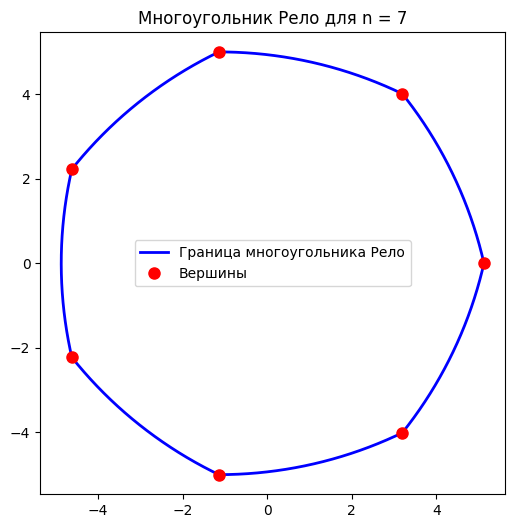

In [5]:
sides_list = [
    vertices[i] + r * np.column_stack((
        np.cos(arc_angles + np.pi + i * alpha),
        np.sin(arc_angles + np.pi + i * alpha)
    ))
    for i in range(n)
]

sides = np.concatenate(sides_list, axis=0)

plt.figure(figsize=(6,6))
plt.plot(sides[:, 0], sides[:, 1], 'b-', lw=2, label='Граница многоугольника Рело')
plt.plot(vertices[:, 0], vertices[:, 1], 'ro', markersize=8, label='Вершины')
plt.axis('equal')
plt.title("Многоугольник Рело для n = 7")
plt.legend()
plt.show()

# Задание 4.3. Результирующая пользовательская функция

а)Напишите пользовательскую функцию `regular_polygon_Relo(n, center, r, N)` на основании кода из Задания 4.2. Функция должна возвращать матрицу, каждая строка которой содержит координаты точек, описывающих границу правильного многоугольника Рело.

Аргументы пользовательской функции:
- `n`: количество вершин правильного многоугольника Рело; является нечетным целым числом большим 2; стандартное значение`3`.
- `center`: массив координат центра правильного многоугольника Рело; стандартное значение `np.array([0, 0])`.
- `r`: ширина правильного многоугольника Рело; является положительным числом, стандартное значение `1`.
- `N`: количество точек для описания одной стороны правильного многоугольника Рело; является натуральным числом; стандартное значение `100`.

Код функции не должен использовать переменные из глобальной области видимости модуля. Внутри функции не должно осуществляться отображение многоугольника Рело.

б)Осуществите контроль за значениями аргументов при вызове функции с помощью оператора `assert`.

в) Укажите аннотации типов и оформите строки документации.Осуществите доступ к аннотации типов и к строкам документации через атрибуты объекта функции.

г) Создайте модуль `relo.py`, в котором будет содержаться пользовательская функция `regular_polygon_Relo`.

In [6]:
import numpy as np  # Добавьте эту строку
import matplotlib.pyplot as plt


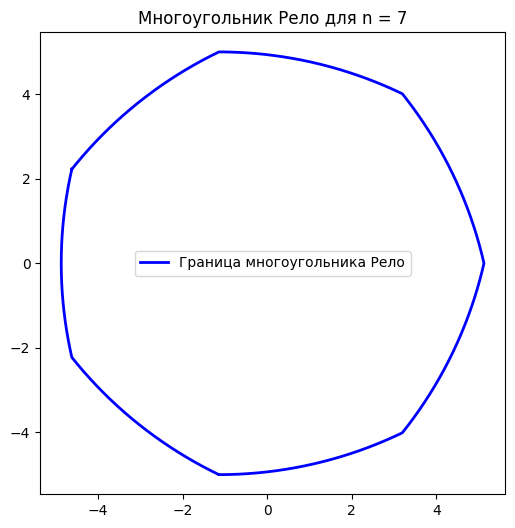

In [7]:
import numpy as np  # Импортируем numpy
import matplotlib.pyplot as plt  # Импортируем matplotlib

def regular_polygon_Relo(n: int = 3, center: np.ndarray = np.array([0, 0]), r: float = 1, N: int = 100) -> np.ndarray:
    """
    Генерирует координаты точек, описывающих границу правильного многоугольника Рело.
    """
    if center is None:
        center = np.array([0.0, 0.0])
    else:
        center = np.array(center, dtype=float)

    assert isinstance(n, int) and n > 2 and (n % 2 == 1), "n must be an odd integer greater than 2"
    assert center.shape == (2,), "center must be a 2-element array representing (x, y)"
    assert isinstance(r, (int, float)) and r > 0, "r must be a positive number"
    assert isinstance(N, int) and N > 0, "N must be a positive integer"
    
    l: float = 2 * r * np.sin(np.pi / (2 * n))
    R: float = l / (2 * np.sin(np.pi / n))
    angles: np.ndarray = np.arange(0, 2 * np.pi, 2 * np.pi / n)
    vertices: np.ndarray = center + R * np.column_stack((np.cos(angles), np.sin(angles)))
    
    alpha: float = 2 * np.pi / n   
    beta: float = alpha / 2        
    arc_angles: np.ndarray = np.linspace(-beta / 2, beta / 2, N)

    sides_list = [
        vertices[i] + r * np.column_stack((
            np.cos(arc_angles + np.pi + i * alpha),
            np.sin(arc_angles + np.pi + i * alpha)
        ))
        for i in range(n)
    ]
    sides: np.ndarray = np.concatenate(sides_list, axis=0)

    return sides

if __name__ == "__main__":
    polygon = regular_polygon_Relo(7, np.array([0, 0]), 10, 100)

    plt.figure(figsize=(6, 6))
    plt.plot(polygon[:, 0], polygon[:, 1], 'b-', lw=2, label='Граница многоугольника Рело')
    plt.axis('equal')
    plt.title("Многоугольник Рело для n = 7")
    plt.legend()
    plt.show()


Type annotations:
{'n': <class 'int'>, 'center': <class 'numpy.ndarray'>, 'r': <class 'float'>, 'N': <class 'int'>, 'return': <class 'numpy.ndarray'>}

Function docstring:

    Генерирует координаты точек, описывающих границу правильного многоугольника Рело.

    :param n: Количество вершин (нечетное целое число > 2), по умолчанию 3
    :param center: Координаты центра (массив numpy), по умолчанию np.array([0, 0])
    :param r: Ширина многоугольника (положительное число), по умолчанию 1
    :param N: Количество точек для одной стороны (натуральное число), по умолчанию 100
    :return: Матрица (numpy ndarray), где каждая строка содержит координаты точек границы

In [1]:
def regular_polygon_Relo(n=3, center=np.array([0, 0]), r=1, N=100):
    """
    Создаёт матрицу точек, описывающих границу правильного многоугольника Рело.

    Аргументы:
    n (int): количество вершин правильного многоугольника Рело, является нечетным целым числом большим 2.
    center (np.ndarray): массив координат центра правильного многоугольника Рело.
    r (float): ширина правильного многоугольника Рело, является положительным числом
    N (int): количество точек для описания одной стороны правильного многоугольника Рело; является натуральным числом;

    Возвращает:
    np.ndarray: матрица, каждая строка которой содержит координаты точек, описывающих границу правильного многоугольника Рело.

    """
    assert isinstance(n, int) and n > 2 and n % 2 == 1, "количество вершин n должно быть нечётным целым числом больше 2"
    assert isinstance(center, np.ndarray) and center.shape == (2,), "координаты центра center должны быть массивом из 2 элементов"
    assert isinstance(r, (int, float)) and r > 0, "радиус r должно быть положительным числом"
    assert isinstance(N, int) and N > 0, "количество точек N для описания одной стороны правильного многоугольник должно быть натуральным числом"
    t = np.arange(0,2*np.pi,2*np.pi/n)
    vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
    alpha = 2*np.pi/n
    beta = alpha/2
    angle = np.linspace(-beta/2, beta/2, N)
    list_sides=[vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha), np.sin(angle + np.pi + i*alpha)]) for i in range(n)] 
    sides=np.concatenate(list_sides)
    l=math.sqrt(2*r*r*(1-math.cos(beta)))
    R = l/(2*np.sin(np.pi/n))
    return sides

NameError: name 'np' is not defined

In [ ]:
import relo

# Задание 4.4. Тестирование функции


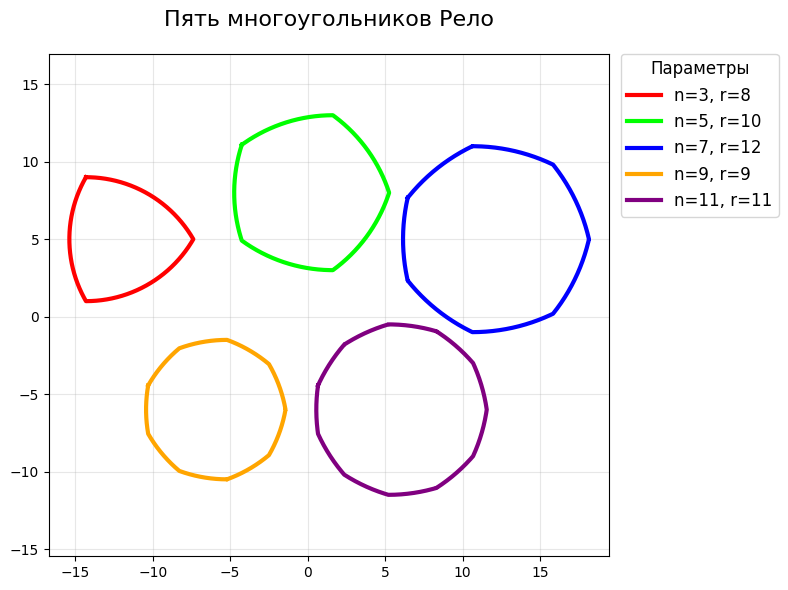

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def regular_polygon_Relo(n: int, center: np.ndarray = np.array([0, 0]), r: float = 10., N: int = 100) -> np.ndarray:
    # Проверки входных параметров
    assert isinstance(n, int) and n > 2 and n % 2 != 0, "n должно быть нечетным и больше 2"
    assert r > 0, "Радиус должен быть положительным"
    assert N >= 1, "Число точек должно быть минимум 1"

    # Вычисление длины стороны многоугольника Рело
    l = 2 * r * np.sin(np.pi / (2 * n))
    R = l / (2 * np.sin(np.pi / n))

    # Вычисление координат вершин правильного многоугольника
    t = np.arange(0, 2 * np.pi, 2 * np.pi / n)
    vertices = center + R * np.transpose([np.cos(t), np.sin(t)])

    # Вычисление углов поворота для дуг Рело
    alpha = 2 * np.pi / n
    beta = alpha / 2
    angle = np.linspace(-beta / 2, beta / 2, N)

    # Формирование дуг сторон многоугольника Рело
    list_sides = [
        vertices[i] + r * np.transpose([
            np.cos(angle + np.pi + i * alpha),
            np.sin(angle + np.pi + i * alpha)
        ])
        for i in range(n)
    ]

    return np.concatenate(list_sides)

if __name__ == "__main__":
    plt.figure(figsize=(8, 6))

    # Параметры для многоугольников Рело
    params = [
        (3, np.array([-12, 5]), 8),  
        (5, np.array([0, 8]), 10), 
        (7, np.array([12, 5]), 12), 
        (9, np.array([-6, -6]), 9),   
        (11, np.array([6, -6]), 11)  
    ]

    colors = ['red', 'lime', 'blue', 'orange', 'purple']

    # Построение многоугольников Рело
    for i, (n, center, r) in enumerate(params):
        polygon = regular_polygon_Relo(n, center, r, 100)
        plt.plot(polygon[:, 0], polygon[:, 1], 
                 color=colors[i], 
                 linewidth=3,
                 label=f'n={n}, r={r}')

    plt.axis('equal')
    plt.grid(True, alpha=0.3)
    plt.title("Пять многоугольников Рело", fontsize=16, pad=20)

    # Настройка легенды
    legend = plt.legend(bbox_to_anchor=(1.02, 1),  loc='upper left', borderaxespad=0., fontsize=12, 
                        title="Параметры", title_fontsize=12)

    plt.tight_layout()
    plt.show()


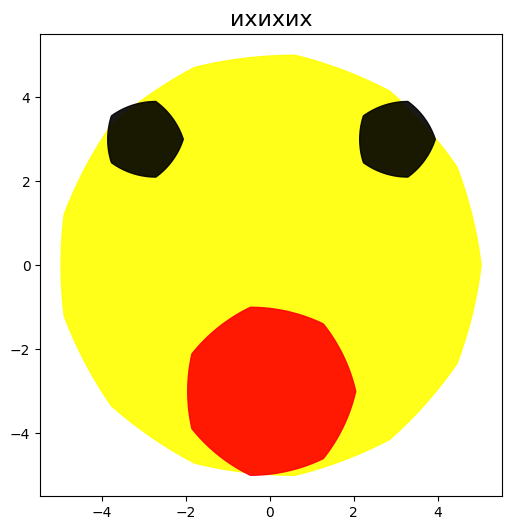

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def regular_polygon_Relo(n: int, center: np.ndarray, r: float, N: int = 100) -> np.ndarray:
    """Создает многоугольник Рело с n сторонами."""
    assert isinstance(n, int) and n > 2 and n % 2 != 0, "n должно быть нечетным и больше 2"
    assert r > 0, "Радиус должен быть положительным"
    assert N >= 1, "Число точек должно быть минимум 1"

    l = 2 * r * np.sin(np.pi / (2 * n))
    R = l / (2 * np.sin(np.pi / n))

    t = np.arange(0, 2 * np.pi, 2 * np.pi / n)
    vertices = center + R * np.transpose([np.cos(t), np.sin(t)])

    alpha = 2 * np.pi / n
    beta = alpha / 2
    angle = np.linspace(-beta / 2, beta / 2, N)

    list_sides = [
        vertices[i] + r * np.transpose([
            np.cos(angle + np.pi + i * alpha),
            np.sin(angle + np.pi + i * alpha)
        ])
        for i in range(n)
    ]

    return np.concatenate(list_sides)

# Создание смайлика 
plt.figure(figsize=(6, 6))
ax = plt.gca()
ax.set_aspect('equal')
plt.grid(False)

# Лицо (13-угольник Рело)
face = regular_polygon_Relo(13, np.array([0, 0]), 10, 150)
plt.fill(face[:, 0], face[:, 1], color='yellow', alpha=0.9)

# Левый глаз (пятиугольник Рело)
left_eye = regular_polygon_Relo(5, np.array([-3, 3]), 1.8, 100)
plt.fill(left_eye[:, 0], left_eye[:, 1], color='black', alpha=0.9)

# Правый глаз (пятиугольник Рело)
right_eye = regular_polygon_Relo(5, np.array([3, 3]), 1.8, 100)
plt.fill(right_eye[:, 0], right_eye[:, 1], color='black', alpha=0.9)

# Рот (дуга из 7-угольника Рело)
mouth = regular_polygon_Relo(7, np.array([0, -3]), 4, 150)
plt.fill(mouth[:, 0], mouth[:, 1], color='red', alpha=0.9)

# Показываем смайлик 
plt.title("ихихих", fontsize=16)
plt.show()
